# Simple Regression


## Importing Libraries

In [1]:
## Import the libraries first
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
    
#Read from file Inflation.xlsx.  
df = pd.read_excel('Inflation.xlsx',sheet_name ='Inflation')

#The variable df is called  a dataframe. Check columns
df

,Money_Supply,Inflation
0,10.310000,3.930000
1,3.950000,0.300000
2,16.100000,4.610000
3,5.340000,1.580000
4,11.560000,3.890000
5,6.180000,2.630000
6,11.169033,4.724347
7,11.206012,3.959715
8,10.562033,4.788683
9,10.763508,4.332820


## Method 1 - using polyfit function

Slope: 0.365
Constant: -0.441


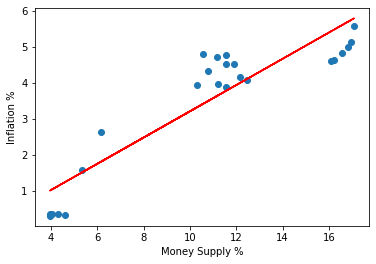

In [2]:
#Assign X and Y from columns in the dataframe
X=df.Money_Supply
Y=df.Inflation
m, b = np.polyfit(X, Y, 1)
print("Slope: " + str(round(m,3)))
print("Constant: " + str(round(b,3)))
plt.plot(X, Y, 'o')
plt.plot(X,m*X+b,'red')
plt.xlabel('Money Supply %')
plt.ylabel('Inflation %')
plt.show()

## Method 2 - using the statmodels library

In [3]:
#Method 2, using OLS
X = df.Money_Supply
Y = df.Inflation
corr = X.corr(Y) 
print("Correlation is: "+ str(round(corr,3)))
rsquared = corr*corr
print("R-squared is: "+ str(round(rsquared,3)))

X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
model.summary()

Correlation is: 0.914
R-squared is: 0.835


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Inflation   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     111.1
Date:                Fri, 22 Oct 2021   Prob (F-statistic):           4.60e-10
Time:                        14:04:13   Log-Likelihood:                -26.427
No. Observations:                  24   AIC:                             56.85
Df Residuals:                      22   BIC:                             59.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.4407      0.402     -1.096      0.285      -1.275       0.393
Money_Supply     0.3647      0.035     10.539      0.000       0.293       0.436
==============================================================================
Omnibus:                        6.929   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                2.122
Skew:                           0.274   Prob(JB):                        0.346
Kurtosis:                       1.650   Cond. No.                         30.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""